In [31]:
from numpy.random import normal
import numpy as np
from numpy.linalg import inv

from scipy import *
from scipy.linalg import norm, pinv
from scipy.misc import derivative

from sympy import symbols, diff
import matplotlib.pyplot as plt

import numdifftools as nd

def partial_function(f___,input,pos,value):
    tmp  = input[pos]
    input[pos] = value
    ret = f___(*input)
    input[pos] = tmp
    return ret


def partial_derivative(f,input):
    ret = np.empty(len(input))
    for i in range(len(input)):
        fg = lambda x:partial_function(f,input,i,x)
        ret[i] = nd.Derivative(fg)(input[i])
    return ret


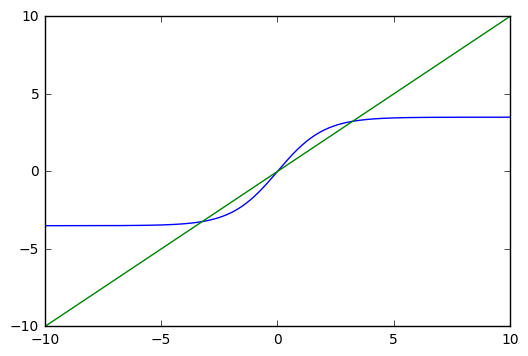

In [51]:
#Create the model

T = 1000
np.random.seed(0)


# function 1 : Gabor filter
Q = np.identity(1) * 0.2
R = np.identity(1) * 0.2
f = lambda k,x_k: 0.01*x_k+20*np.sin(x_k)*np.exp(-x_k**2/2)

# function 2 : Well
Q = np.identity(1) * 1
R = np.identity(1) * 1
f = lambda k,x_k: 0.9*x_k-50*np.exp(-x_k**2/2)+1

# function 3 : Sigmoid
Q = np.identity(1) * 1
R = np.identity(1) * 1
f = lambda k,x_k:7*(1/(1+np.exp(-x_k))-0.5)

absc = np.linspace(-10,10,1000)
ordo = f(1,absc)

plt.figure()
plt.plot(absc,ordo)
plt.plot(absc,absc)
plt.show()


h = lambda k,x_k: (1 + 1/(k+1))*x_k

B = np.zeros([1,1])
D = np.zeros([1,1])

mean = np.zeros([1,1])

x = np.zeros((T,1))
y = np.zeros((T,1))
u = np.zeros((T,1))


In [52]:
def extended_KF(x0,y,T,f,h,R,Q):

    #Initialization
    V = np.zeros([T,1])
    V[0] = np.identity(1)
    x_f = np.zeros([T,1])
    x_f[0] = x0
    
    V_plus_all = np.zeros([T,1])
    A_all = np.zeros([T,1])
    C_all = np.zeros([T,1])
    x_plus_all = np.zeros([T,1])

    #Propagation
    for k in range(1,T):   
        A_all[k-1] = np.matrix(partial_derivative(f,np.array([k-1,x_f[k-1]]))[1]) #derivative of f, with respect to x_k
        x_plus = f(k-1,x_f[k-1])
        x_plus_all[k] = x_plus
        C_all[k] = np.matrix(partial_derivative(h,np.array([k,x_plus]))[1]) #derivative of h, with respect to x_k
        V_plus = np.matrix(A_all[k-1].dot(V[k-1])).dot(A_all[k-1].T) + Q 
        V_plus_all[k] = V_plus

        K = V_plus.dot(C_all[k].T).dot(inv(C_all[k].dot(V_plus.dot(C_all[k].T) + R)))
        x_f[k] = x_plus + K.dot(y[k] - h(k,x_plus))
        V[k] = (np.identity(K.shape[0]) - K.dot(C_all[k])).dot(V_plus)

    A_all[T-1] = np.matrix(partial_derivative(f,np.array([T-1,x_f[T-1]]))[1]) #derivative of f, with respect to x_k

    #Recursive
    #F = A, B = H, P = V

    #Initialization
    x_b = np.zeros([T,1])
    x_b[T-1] = x_f[-1]
    V_b = np.zeros([T,1])
    V_b[-1] = V[-1]

    #Propagation
    #Remark: compared to the table 1.2 on page 17, we changed all the indexes by -1
    for k in range(T-1, 0, -1): #from T-1 to 1 by -1 increments

        A_b = np.matrix(V[k-1].dot(A_all[k].T)).dot(inv(np.matrix(V_plus_all[k])))
        V_b[k-1] = V[k-1] - A_b.dot(V_plus_all[k] - V_b[k]).dot(A_b.T)
        x_b[k-1] = x_f[k-1] + A_b.dot(x_b[k] - x_plus_all[k])
    
    return x_f,x_b

[ 3.49999985]
[ 3.36113924]
[ 3.40990773]
[ 3.47548326]
[ 3.46669011]
[ 2.96377366]
[ 3.36299235]
[ 3.22888852]
[ 3.20557484]
[ 3.31672976]
[ 3.28685564]
[ 3.43942723]
[ 3.39662914]
[ 3.2984288]
[ 3.33794267]
[ 3.3263692]
[ 3.44400926]
[ 3.23589291]
[ 3.3043444]
[ 2.94405743]
[ 0.67577776]
[ 2.03518537]
[ 3.13479409]
[ 2.91384452]
[ 3.4609644]
[ 2.67041714]
[ 3.06582088]
[ 3.1274616]
[ 3.43437184]
[ 3.44845046]
[ 3.31443584]
[ 3.32988665]
[ 2.93987318]
[ 1.56055836]
[ 1.89536782]
[ 2.70284683]
[ 3.36555771]
[ 3.42809096]
[ 3.18067476]
[ 3.12736812]
[ 2.72178906]
[ 2.00293036]
[ 0.51538106]
[ 2.95214459]
[ 2.94007489]
[ 2.96997365]
[ 2.43435518]
[ 3.22894334]
[ 2.33877496]
[ 2.75385585]
[ 2.55576368]
[ 3.14941007]
[ 3.03313625]
[ 2.55094589]
[ 2.98005616]
[ 3.27575959]
[ 3.26095712]
[ 3.30707739]
[ 3.04779808]
[ 3.05297375]
[ 2.90730457]
[ 2.99195615]
[ 2.78831298]
[ 1.70154853]
[ 2.57245318]
[ 2.78309346]
[ 1.82027526]
[ 2.85224881]
[ 2.62426496]
[ 3.04925734]
[ 3.34355344]
[ 3.2892731

C:\Users\abc\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: divide by zero encountered in double_scalars


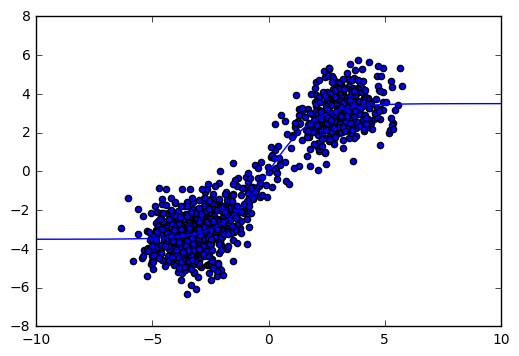

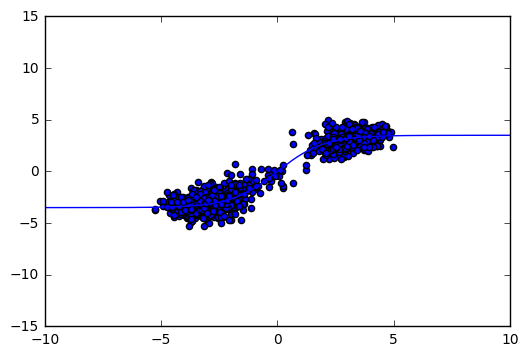

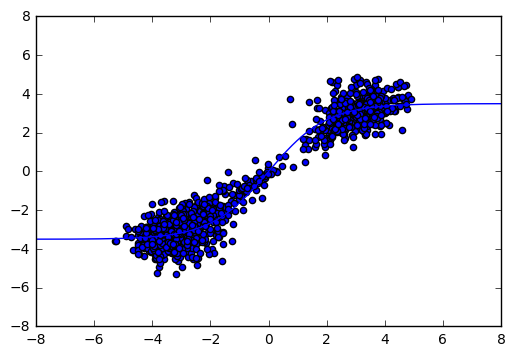

In [53]:
iterations = 1

x_it = np.zeros((iterations,T))
y_it = np.zeros((iterations,T))
x_f_it = np.zeros((iterations,T))
x_b_it = np.zeros((iterations,T))

for i in range(iterations):    
    x[0] = normal(0,10)

    #Propagation
    for k in range(T-1):
        print(f(k,x[k]))
        x[k+1] = f(k,x[k]) + np.dot(B,u[k]) + normal(mean,Q)
    for k in range(T):
        y[k] = h(k,x[k])  + np.dot(D,u[k]) + normal(mean,R)
        
    x_it[i] = x.flatten()
    y_it[i] = y.flatten()
    
    x_f,x_b = extended_KF(x[0],y,T,f,h,R,Q)
    
    x_f_it[i] = x_f.flatten()
    x_b_it[i] = x_b.flatten()
    
absc = np.linspace(-10,10,1000)
ordo = f(1,absc)

plt.figure()
plt.plot(absc,ordo)
for i in range(iterations):
    plt.scatter(x_it[i,:-1],x_it[i,1:])
plt.xlim(-10,10)
#plt.savefig("graphs/x3.eps",format = "eps")
    
plt.figure()
plt.plot(absc,ordo)
for i in range(iterations):
    plt.scatter(x_f_it[i,:-1],x_f_it[i,1:])
plt.xlim(-10,10)
plt.ylim(-15,15)

plt.figure()
plt.plot(absc,ordo)
#plt.plot(absc,absc)
for i in range(iterations):
    plt.scatter(x_b_it[i,:-1],x_b_it[i,1:])
#plt.savefig("graphs/x3_b.eps",format = "eps")
plt.xlim(-8,8)
plt.ylim(-8,8)

plt.show()

In [54]:
def kmeans(x,k):
    n = x.shape[0]
    n_iterations = 1000
    epsilon = 1e-8
    err = np.inf

    #initialize random centroids
    c = np.zeros((k,2))
    for i in range(k):
        idx = np.random.randint(n)
        c[i] = x[idx,:]

    for iteration in range(n_iterations):
        d = np.zeros((n, k))  # distances to centroids square
        for i in range(k):
            d[:, i] = np.sqrt(np.sum(np.square(np.subtract(x, np.tile(c[i, :], (n, 1)))), 1).flatten())

        #assign each point to nearest centroid
        l = np.argmin(d,1)


        #recompute centroids as center of mass of each cluster
        for j in range(k):
            if len(l[l==j]):
                c[j,:] = x[l==j].sum(0) / len(l[l==j])

        err_new = np.sum(np.min(d,1))/n


        if np.abs(err_new - err)<epsilon:
            break
        err = err_new

    return c,l,err

In [55]:
def factor_analysis(X,m):
    #X is a d*n data matrix
    #m : dimension of target space (i.e reduced space)
    d = X.shape[0]
    n = X.shape[1]
    
    mu = np.mean(X, axis = 1)
    
    
    print(d)
    print(n)
    #Mu = dot(mu, np.ones((n,),"float"))
    
    CenteredData = X

    for i in range(n):
        for j in range(d):
            CenteredData[j,i] = X[j,i]-mu[j]
        
    
    #The tolerance value
    tol = 1e-4
    
    #Maximum number of iteration
    maxiter = 50
    
    #Log-likelihood value
    llh = -1
    
    #Define identity matrix 
    I = np.identity(m)
    
    M = dot(CenteredData, np.transpose(CenteredData))
    r = M.diagonal()
    
    #Initialize the weight matrix
    W = np.random.rand(d,m)
    Wupdated = W
    
    #Psi is the diagonal covariance matrix, we store only a d-dimensional vector
    Psi = np.identity(d)
    
    for i in  range(d):
        Psi[i,i] = random.random()
    
    Psiupdated = Psi
    
    for iter in range(maxiter-1):
        Psi = Psiupdated
        W = Wupdated
        G = inv(I + dot(dot(np.transpose(W),inv(Psi)),W))
        R = dot(dot(np.transpose(W), inv(Psi)),CenteredData)
        
        #E-step
        Ez = dot(G,R)
        Ezz = G + dot(Ez, np.transpose(Ez))
        
        #M-step
        DataCovariance = np.cov(CenteredData)
        
        #Updated weights
        Wupdated = dot(CenteredData, np.transpose(Ez))
        Wupdated = dot(Wupdated, inv(Ezz))
        
        #Updated Psi
        V = np.diag(DataCovariance - (1/n)**dot(Wupdated,dot(Ez,np.transpose(CenteredData))))
        Psiupdated = np.diag(V)
        #print(Psiupdated)
        
        
    L = [mu,Wupdated,Psiupdated]
    
    return L
    

In [56]:
np.random.seed(0)


#radial basis function compute exp(-beta * (c-x)^2)
def radialbasisfunc(beta, c, x):
    return exp(-beta * norm(c-x)**2)
     
#activation fills the Phi (in the pdf)
def activation(X, beta, numNeurons, centers):
    # calculate activations of RBFs
    Phi = zeros((X.shape[0], numNeurons), float)
    for i, c in enumerate(centers):
        for j, x in enumerate(X):
            #Here we fill the element j,i with exp(-beta * (c_i-x_j)^2)
            Phi[j,i] = radialbasisfunc(beta, c, x)
    return Phi
     
#trainrbf gives the values of the weights W and the covariance matrix Q
def trainrbf(X, Y, beta, numNeurons):
    
    #Dimensions
    #X: n x Inputdimension
    #y: n x 1
    
    n = X.shape[0]
    
    #Centers are the neurons in our RBF network
    #newCenters = kmeans(X,numNeurons)
    #centers = newCenters[0]
    centers = np.linspace(np.amin(X), np.amax(X), num=numNeurons)
    
    print "center", centers
    
    # calculate activations of RBFs
    Phi = activation(X, beta, numNeurons, centers)
    Phi = np.append(Phi, X, axis =1)
    Phi = np.append(Phi, np.ones((n,X.shape[1]), "float"), axis = 1)
        
        
    print(pinv(Phi).shape[0])
    print(pinv(Phi).shape[1])
    print(Y.shape[0])
        
    # calculate output weights (pseudoinverse)
    W = dot(pinv(Phi), Y)
    
    #Calculate the covariance matrix Q with formula (6.18) 
    Q = (dot(np.transpose(Y),Y) - dot(np.transpose(W), dot(np.transpose(Phi), Y)))
    
    L = [W, Q, centers]
    
   
    #print W
    #print Q
    
    return L
         
def testrbf(X, W, Q, beta, numNeurons, centers):
    """ X: matrix of dimensions n x indim """
         
    Phi = activation(X, beta, numNeurons, centers)
    Phi = np.append(Phi, X, axis=1)
    Phi = np.append(Phi, np.ones((n,X.shape[1]), "float"), axis=1)
    Y = dot(Phi, W) + (1/X.shape[0])*random.normal(0, Q, X.shape[0])
    
    print Phi.shape[1]
    print W.shape[1]
    return Y



center [-8.         -7.33333333 -6.66666667 -6.         -5.33333333 -4.66666667
 -4.         -3.33333333 -2.66666667 -2.         -1.33333333 -0.66666667
  0.          0.66666667  1.33333333  2.          2.66666667  3.33333333
  4.          4.66666667  5.33333333  6.          6.66666667  7.33333333
  8.        ]
27
100
100
27
1


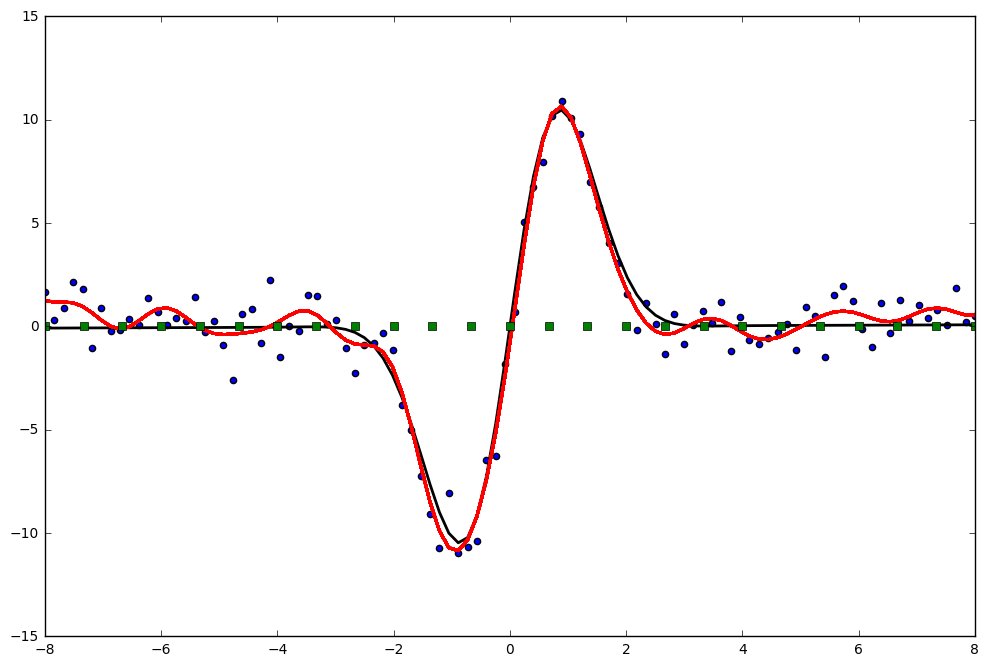

In [57]:
n = 100

#Specify Dimension of inputs and outputs
InputDimension = 1
OutputDimension = 1
     
#Define the bound of the focused interval    
lbound = -8
ubound = 8
    
x = mgrid[lbound:ubound:complex(0,n)].reshape(n, 1)
# set y and add random noise
    
    
#Function 1
yOriginal = 0.01*x+20*np.sin(x)*np.exp(-x**2/2)

# function 2 : Well
#yOriginal = 0.9*x-50*np.exp(-x**2/2)+1

yNoisy = yOriginal + random.normal(0, 1, yOriginal.shape)

     
#Initialize parameters of the radial basis function
    
#Number of Gaussian centers(Neurons)
numNeurons = 25

#Define the size of the kernels 
beta = 1

######### Start RBF regression #############

#Train the neural network on the data x
parameters = trainrbf(x, yNoisy , beta, numNeurons)
z = testrbf(x, parameters[0], parameters[1], beta, numNeurons, parameters[2])
       
# plot original data
plt.figure(figsize=(12, 8))

# plot original data
plt.plot(x,yOriginal, 'k-', linewidth=2)

for i in range(n):
    plt.scatter(x[i], yNoisy[i])
     
# plot learned model
plt.plot(x, z, 'r-', linewidth=2)
     
# plot rbfs
plt.plot(parameters[2], zeros(numNeurons), 'gs')
     
plt.xlim(lbound, ubound)
plt.show()

#plt.savefig('graphs/RBF_2.jpg', format = 'jpg')

C:\Users\abc\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: divide by zero encountered in double_scalars


[[-0.79120009]
 [ 2.12973826]
 [ 3.54851269]
 [ 4.42879508]
 [ 5.48265419]
 [ 4.14190697]
 [ 2.75516402]
 [ 3.44932266]
 [ 3.38418793]
 [ 3.96553487]
 [ 3.69110197]
 [ 5.23188499]
 [ 3.95930783]
 [ 4.62949373]
 [ 3.48045172]
 [ 3.65453307]
 [ 2.50221291]
 [ 3.39650982]
 [ 3.8308388 ]
 [ 2.81467465]
 [ 2.61864355]
 [ 2.64598265]
 [ 3.1781628 ]
 [ 3.19254311]
 [ 5.19324711]
 [ 3.00047794]
 [ 2.89827268]
 [ 3.24141374]
 [ 4.4455513 ]
 [ 4.11140163]
 [ 3.61009579]
 [ 2.59275038]
 [ 2.51495398]
 [ 1.5441641 ]
 [ 2.39808826]
 [ 2.99391798]
 [ 4.12323869]
 [ 5.05239866]
 [ 3.96593053]
 [ 2.1889477 ]
 [ 3.58066017]
 [ 1.23201157]
 [ 2.21305474]
 [ 2.78376938]
 [ 3.68727247]
 [ 3.37695824]
 [ 2.42641303]
 [ 3.07759721]
 [ 1.96404822]
 [ 1.74799112]
 [ 2.22007425]
 [ 2.5203564 ]
 [ 2.65319848]
 [ 3.79214556]
 [ 4.47525461]
 [ 3.02692141]
 [ 3.91156883]
 [ 2.74153557]
 [ 4.01923557]
 [ 2.32573912]
 [ 2.90733828]
 [ 2.47028149]
 [ 2.24337047]
 [ 2.41778487]
 [ 2.4664543 ]
 [ 2.7565068 ]
 [ 2.60565

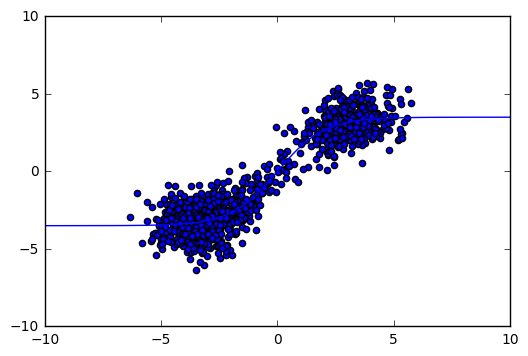

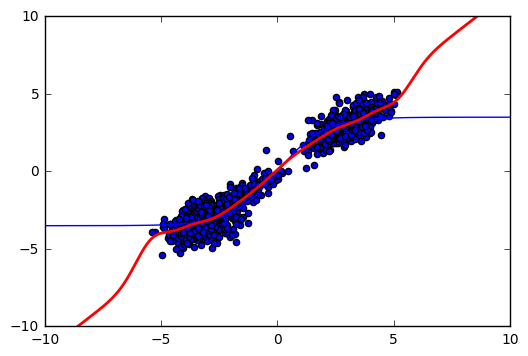

In [58]:
np.random.seed(0)

#EM algorithm

# x_k+1 = f(x_k) + w_k
# y_k = C*x_k + v_k

#Parameters of the sample which has to be inferred
mean = 0
Q=1
R=1

#x and y are the points we need to 
x = np.zeros((T,1))
y = np.zeros((T,1))


#We fix the number of kernel centers and the width of Gaussians

#Number of Gaussian centers(Neurons)
numNeurons = 8

#Define the size of the kernels 
beta = 1

Q_k=1

#Define the initial rbf with all weights equal to 1
W_k = np.ones(numNeurons+2)
centers = linspace(-7,7,numNeurons)

def rbf(k, x_k):
        u=0
        for i in range(numNeurons):
            u += exp(-beta * norm(centers[i]-x_k)**2) * W_k[i]
        u += x_k * W_k[numNeurons] + W_k[numNeurons+1]
        return u

x[0] = normal(mean,Q)
#Propagation
for k in range(T-1):
    x[k+1] = f(k,x[k]) + normal(mean,Q)
for k in range(T):
    y[k] = h(k,x[k]) + normal(mean,R)

#Number of iterations 
maxIter = 5

#Start the EM algorithm
for t in range(maxIter):
    
    #E-Step
    
    
    #Input : f,C,Q,R, y_1, ..., y_T
    #Output : x_1,...,x_T
    
    
    iterations = 1

    x_f_it = np.zeros((iterations,T))
    x_b_it = np.zeros((iterations,T))

    for i in range(iterations):    
        
        
        #Q_k = (1/np.sqrt(T))*Q_k
        
        #Start with the initial mean=0
        x[0] = normal(mean,Q)
        
        #Infer the states with non-linear Kalman filter
        x_f,x_b = extended_KF(x[0],y,T,rbf,h,R,Q)
        
        x_it[i] = x.flatten()
        y_it[i] = y.flatten()
    
        x_f_it[i] = x_f.flatten()
        x_b_it[i] = x_b.flatten()
        
        
        
        print(x_b)
        
    #M-Step
    
    #Input : x_1, ..., x_T, y_1,..., y_T
    #Output : f,C,Q,R.
    
    
    #Learn the state parameters
    
    #X represents x_k
    #Y represents x_{k+1}
    
    X = x_b[0:T-2]
    Y = x_b[1:T-1]
    
    # 0 :W_k
    # 1: Q_k
    # 2: centers
    
    #Train the rbf and learn the new parameters
    StateParameters = trainrbf(X,Y, beta, numNeurons)
    
    W_k = StateParameters[0]
    Q_k = StateParameters[1]
    centers = StateParameters[2]
    
    #Update the Radial basis function with the new centers and the new weights
    def rbf(k, x_k):
        u=0
        for i in range(numNeurons):
            u += exp(-beta * norm(centers[i]-x_k)**2) * W_k[i]
        u += x_k * W_k[numNeurons] + W_k[numNeurons+1]
        return u
    

print x_b



absc = np.linspace(-10,10,1000)
ordof = f(1,absc)
ordorbf = np.zeros(T)
for i in range(T):
    ordorbf[i] = rbf(1,absc[i])
    
#Plot the real states and the real function
plt.figure()
plt.plot(absc,ordof)
for i in range(iterations):
    plt.scatter(x_it[i,:-1],x_it[i,1:])
plt.xlim(-10,10)
plt.ylim(-10,10)

#Plot the infered states and the corresponding radial basis function
plt.figure()
plt.plot(absc,ordof)
plt.plot(absc,ordorbf, 'r-', linewidth=2)
for i in range(iterations):
    plt.scatter(x_b_it[i,:-1],x_b_it[i,1:])
plt.xlim(-10,10)
plt.ylim(-10,10)

        
plt.show()


